In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"C:\Users\altam\Desktop\dataset.csv\dataset.csv")

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Display the head of the dataset
print("\n First few rows of the dataset:")
print(df.head())

print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Dataset shape: (135408, 5)

Columns in the dataset:
['country', 'date', 'sector', 'value', 'timestamp']

 First few rows of the dataset:
     country        date sector      value   timestamp
0     Brazil  01/01/2019  Power   0.096799  1546300800
1      China  01/01/2019  Power  14.816100  1546300800
2  EU27 & UK  01/01/2019  Power   1.886490  1546300800
3     France  01/01/2019  Power   0.051217  1546300800
4    Germany  01/01/2019  Power   0.315002  1546300800

Data Types:
 country       object
date          object
sector        object
value        float64
timestamp      int64
dtype: object

Missing values per column:
country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64

Basic statistics:
               value     timestamp
count  135408.000000  1.354080e+05
mean        2.359439  1.615896e+09
std         5.908582  4.020589e+07
min         0.000078  1.546301e+09
25%         0.078661  1.581098e+09
50%         0.314597  1.615896e+09
75%         1.636632

In [28]:
# Convert string date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Convert timestamp to datetime and compare with date column
df['timestamp_converted'] = pd.to_datetime(df['timestamp'], unit='s')

# Check if dates match
date_mismatch = df[df['date'] != df['timestamp_converted'].dt.date]
print(f"\nDate mismatches found: {len(date_mismatch)}")

# Drop redundant timestamp columns
df = df.drop(['timestamp', 'timestamp_converted'], axis=1)



Date mismatches found: 0


In [29]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Strategy for handling missing values
if missing_values.sum() > 0:
    # For numerical columns
    df['value'] = df['value'].fillna(df.groupby(['country', 'sector'])['value'].transform('mean'))
    
    # For categorical columns
    df['sector'] = df['sector'].fillna('Unknown')



Missing Values:
 country    0
date       0
sector     0
value      0
dtype: int64


In [30]:
# Check unique sectors
print("\nUnique Sectors:", df['sector'].unique())

# Standardize sector names
sector_mapping = {
    'power': 'Power',
    'Power': 'Power',
    'energy': 'Energy'
}
df['sector'] = df['sector'].str.strip().replace(sector_mapping)



Unique Sectors: ['Power' 'Industry' 'Ground Transport' 'Residential' 'Domestic Aviation'
 'International Aviation']


In [31]:
# Check for duplicates
duplicates = df.duplicated(subset=['country', 'date', 'sector']).sum()
print(f"\nDuplicate Entries Found: {duplicates}")

# Remove duplicates while preserving NaNs
df = df.drop_duplicates(subset=['country', 'date', 'sector'], keep='first')



Duplicate Entries Found: 0


In [32]:
# Statistical summary
print("\nValue Column Summary:\n", df['value'].describe())

# Identify outliers using IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print(f"\nPotential Outliers Found: {len(outliers)}")



Value Column Summary:
 count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64

Potential Outliers Found: 17519


In [33]:


# ------------------------------

india_sector_trend = df[df['country'] == 'India'].groupby(['date', 'sector'])['value'].sum().unstack().fillna(0)
print("\nIndia Sector-Wise Emission Trend:\n", india_sector_trend)

# ------------------------------
# 5. Country with the Highest Total Emissions Across All Years
total_emission_by_country = df.groupby('country')['value'].sum().sort_values(ascending=False)
print("\nCountry with Highest Emissions:\n", total_emission_by_country)

# 1. Top 10 CO₂ Emitting Countries (Latest Year)
latest_year = df['date'].max()
top_countries = df[df['date'] == latest_year].groupby('country')['value'].sum().sort_values(ascending=False).head(10)
print("Top 10 CO₂ Emitting Countries (Latest Year):\n", top_countries)

# ------------------------------
# 2. Total Global CO₂ Emissions by Year
global_emissions_by_year = df.groupby('date')['value'].sum()
print("\nGlobal CO₂ Emissions by Year:\n", global_emissions_by_year)

# ------------------------------
# 3. Top Emitting Sectors in Latest Year
top_sectors = df[df['date'] == latest_year].groupby('sector')['value'].sum().sort_values(ascending=False)
print("\nTop Emitting Sectors (Latest Year):\n", top_sectors)

# ------------------------------
# 4. Sector-wise Emissions Trend for a Specific Country (e.g., India)
india_sector_trend = df[df['country'] == 'India'].groupby(['date', 'sector'])['value'].sum().unstack().fillna(0)
print("\nIndia Sector-Wise Emission Trend:\n", india_sector_trend)

# ------------------------------
# 6. Top 5 Polluting Sectors (All Time)
top_polluting_sectors = df.groupby('sector')['value'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Polluting Sectors:\n", top_polluting_sectors)

# ------------------------------
# 7. Annual Emissions of a Sector (e.g., Transport)
transport_trend = df[df['sector'] == 'Transport'].groupby('date')['value'].sum()
print("\nAnnual Emissions of Transport Sector:\n", transport_trend)

# ------------------------------
# 8. Compare Emissions Between India and China
compare_india_china = df[df['country'].isin(['India', 'China'])].groupby(['date', 'country'])['value'].sum().unstack()
print("\nIndia vs China Emissions:\n", compare_india_china)

# ------------------------------
# 9. Highest Emission Country in 2022
emissions_2022 = df[df['date'].dt.year == 2022].groupby('country')['value'].sum().sort_values(ascending=False)
print("\nHighest Emitting Country in 2022:\n", emissions_2022.head(1))

# ------------------------------
# 10. Year with Peak Global Emissions
peak_year = global_emissions_by_year.idxmax()
print(f"\nYear with Peak Global Emissions: {peak_year}")

# ------------------------------
# 11. YoY Emission Growth Rate by Country
df_grouped = df.groupby(['country', 'date'])['value'].sum().reset_index()
df_grouped['prev_year'] = df_grouped['date'] - pd.DateOffset(years=1)
df_prev = df_grouped[['country', 'date', 'value']].copy()
df_prev.columns = ['country', 'prev_year', 'prev_value']

yoy = pd.merge(df_grouped, df_prev, on=['country', 'prev_year'])
yoy['yoy_growth_percent'] = ((yoy['value'] - yoy['prev_value']) / yoy['prev_value']) * 100
print("\nYoY Emission Growth by Country:\n", yoy[['country', 'date', 'value', 'prev_value', 'yoy_growth_percent']])

# ------------------------------
# 12. Sector CAGR Calculation
sector_stats = df.groupby(['sector', 'date'])['value'].sum().reset_index()
cagr_results = []

for sector in sector_stats['sector'].unique():
    data = sector_stats[sector_stats['sector'] == sector].sort_values('date')
    start_year = data['date'].min()
    end_year = data['date'].max()
    start_value = data[data['date'] == start_year]['value'].sum()
    end_value = data[data['date'] == end_year]['value'].sum()
    
    years = (end_year - start_year).days / 365.25
    if start_value > 0 and end_value > 0 and years > 0:
        cagr = (pow(end_value / start_value, 1 / years) - 1) * 100
        cagr_results.append((sector, round(cagr, 2)))

cagr_df = pd.DataFrame(cagr_results, columns=['Sector', 'CAGR_percent']).sort_values(by='CAGR_percent', ascending=False)
print("\nSector-wise CAGR:\n", cagr_df)

# ------------------------------
# 13. Emission Distribution by Sector in Each Country
sector_distribution = df.groupby(['country', 'sector'])['value'].sum().reset_index()
total_by_country = df.groupby('country')['value'].sum().reset_index().rename(columns={'value': 'total'})
sector_distribution = sector_distribution.merge(total_by_country, on='country')
sector_distribution['sector_percent'] = (sector_distribution['value'] / sector_distribution['total']) * 100
print("\nEmission Share by Sector in Each Country:\n", sector_distribution)

# ------------------------------
# 14. Emission Shock Years (>30% Increase)
shock_df = yoy[yoy['yoy_growth_percent'] > 30]
print("\nCountries with Emission Shock Years (>30% Growth):\n", shock_df[['country', 'date', 'yoy_growth_percent']])



India Sector-Wise Emission Trend:
 sector      Domestic Aviation  Ground Transport  Industry  \
date                                                        
2019-01-01           0.020160          0.816210   2.06511   
2019-01-02           0.020647          0.834113   2.09038   
2019-01-03           0.019910          0.841574   2.11367   
2019-01-04           0.020437          0.842256   2.13425   
2019-01-05           0.020222          0.834500   2.11818   
...                       ...               ...       ...   
2023-05-27           0.018720          0.830792   1.98523   
2023-05-28           0.018668          0.770767   2.04944   
2023-05-29           0.018807          0.812097   2.22426   
2023-05-30           0.018701          0.832084   2.27646   
2023-05-31           0.018701          0.835040   2.24028   

sector      International Aviation    Power  Residential  
date                                                      
2019-01-01                0.033150  3.34922     1.67

In [34]:


# Ensure date is treated as integer (year)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.year

# ------------------------------

india_sector_trend = df[df['country'] == 'India'].groupby(['date', 'sector'])['value'].sum().unstack().fillna(0)
print("\nIndia Sector-Wise Emission Trend:\n", india_sector_trend)

# ------------------------------
# 5. Country with the Highest Total Emissions Across All Years
total_emission_by_country = df.groupby('country')['value'].sum().sort_values(ascending=False)
print("\nCountry with Highest Emissions:\n", total_emission_by_country)
# 1. Top 10 CO₂ Emitting Countries (Latest Year)
latest_year = df['date'].max()
top_countries = df[df['date'] == latest_year].groupby('country')['value'].sum().sort_values(ascending=False).head(10)
print("Top 10 CO₂ Emitting Countries (Latest Year):\n", top_countries)

# ------------------------------
# 2. Total Global CO₂ Emissions by Year
global_emissions_by_year = df.groupby('date')['value'].sum()
print("\nGlobal CO₂ Emissions by Year:\n", global_emissions_by_year)

# ------------------------------
# 3. Top Emitting Sectors in Latest Year
top_sectors = df[df['date'] == latest_year].groupby('sector')['value'].sum().sort_values(ascending=False)
print("\nTop Emitting Sectors (Latest Year):\n", top_sectors)

# ------------------------------
# 4. Sector-wise Emissions Trend for a Specific Country (e.g., India).head(1))

# ------------------------------
# 6. Top 5 Polluting Sectors (All Time)
top_polluting_sectors = df.groupby('sector')['value'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Polluting Sectors:\n", top_polluting_sectors)

# ------------------------------
# 7. Annual Emissions of a Sector (e.g., Transport)
transport_trend = df[df['sector'] == 'Transport'].groupby('date')['value'].sum()
print("\nAnnual Emissions of Transport Sector:\n", transport_trend)

# ------------------------------
# 8. Compare Emissions Between India and China
compare_india_china = df[df['country'].isin(['India', 'China'])].groupby(['date', 'country'])['value'].sum().unstack()
print("\nIndia vs China Emissions:\n", compare_india_china)

# ------------------------------
# 9. Highest Emission Country in 2022
emissions_2022 = df[df['date'] == 2022].groupby('country')['value'].sum().sort_values(ascending=False)
print("\nHighest Emitting Country in 2022:\n", emissions_2022.head(1))

# ------------------------------
# 10. Year with Peak Global Emissions
peak_year = global_emissions_by_year.idxmax()
print(f"\nYear with Peak Global Emissions: {peak_year}")

# ------------------------------
# 11. YoY Emission Growth Rate by Country
df_grouped = df.groupby(['country', 'date'])['value'].sum().reset_index()
df_grouped['prev_year'] = df_grouped['date'] - 1
df_prev = df_grouped[['country', 'date', 'value']].copy()
df_prev.columns = ['country', 'prev_year', 'prev_value']

yoy = pd.merge(df_grouped, df_prev, on=['country', 'prev_year'])
yoy['yoy_growth_percent'] = ((yoy['value'] - yoy['prev_value']) / yoy['prev_value']) * 100
print("\nYoY Emission Growth by Country:\n", yoy[['country', 'date', 'value', 'prev_value', 'yoy_growth_percent']])

# ------------------------------
# 12. Sector CAGR Calculation
sector_stats = df.groupby(['sector', 'date'])['value'].sum().reset_index()
cagr_results = []

for sector in sector_stats['sector'].unique():
    data = sector_stats[sector_stats['sector'] == sector].sort_values('date')
    start_year = data['date'].min()
    end_year = data['date'].max()
    start_value = data[data['date'] == start_year]['value'].sum()
    end_value = data[data['date'] == end_year]['value'].sum()
    
    if start_value > 0 and end_value > 0:
        cagr = (pow(end_value / start_value, 1 / (end_year - start_year)) - 1) * 100
        cagr_results.append((sector, round(cagr, 2)))

cagr_df = pd.DataFrame(cagr_results, columns=['Sector', 'CAGR_percent']).sort_values(by='CAGR_percent', ascending=False)
print("\nSector-wise CAGR:\n", cagr_df)

# ------------------------------
# 13. Emission Distribution by Sector in Each Country
sector_distribution = df.groupby(['country', 'sector'])['value'].sum().reset_index()
total_by_country = df.groupby('country')['value'].sum().reset_index().rename(columns={'value': 'total'})
sector_distribution = sector_distribution.merge(total_by_country, on='country')
sector_distribution['sector_percent'] = (sector_distribution['value'] / sector_distribution['total']) * 100
print("\nEmission Share by Sector in Each Country:\n", sector_distribution)

# ------------------------------
# 14. Emission Shock Years (>30% Increase)
shock_df = yoy[yoy['yoy_growth_percent'] > 30]
print("\nCountries with Emission Shock Years (>30% Growth):\n", shock_df[['country', 'date', 'yoy_growth_percent']])



India Sector-Wise Emission Trend:
 sector  Domestic Aviation  Ground Transport    Industry  \
date                                                      
2019             7.195749        299.629720  751.124420   
2020             3.907665        258.160396  655.950875   
2021             5.179727        268.914040  744.472220   
2022             6.440595        290.621134  773.551690   
2023             2.950077        121.308939  335.202360   

sector  International Aviation       Power  Residential  
date                                                     
2019                 12.043827  1197.63998   204.052731  
2020                  5.571773  1139.54510   201.618102  
2021                  6.043414  1278.17489   184.706526  
2022                 10.476677  1390.28136   191.221548  
2023                  5.057851   659.48004    97.435898  

Country with Highest Emissions:
 country
WORLD        155539.622124
China         48003.071381
ROW           46392.618476
US            21631.8

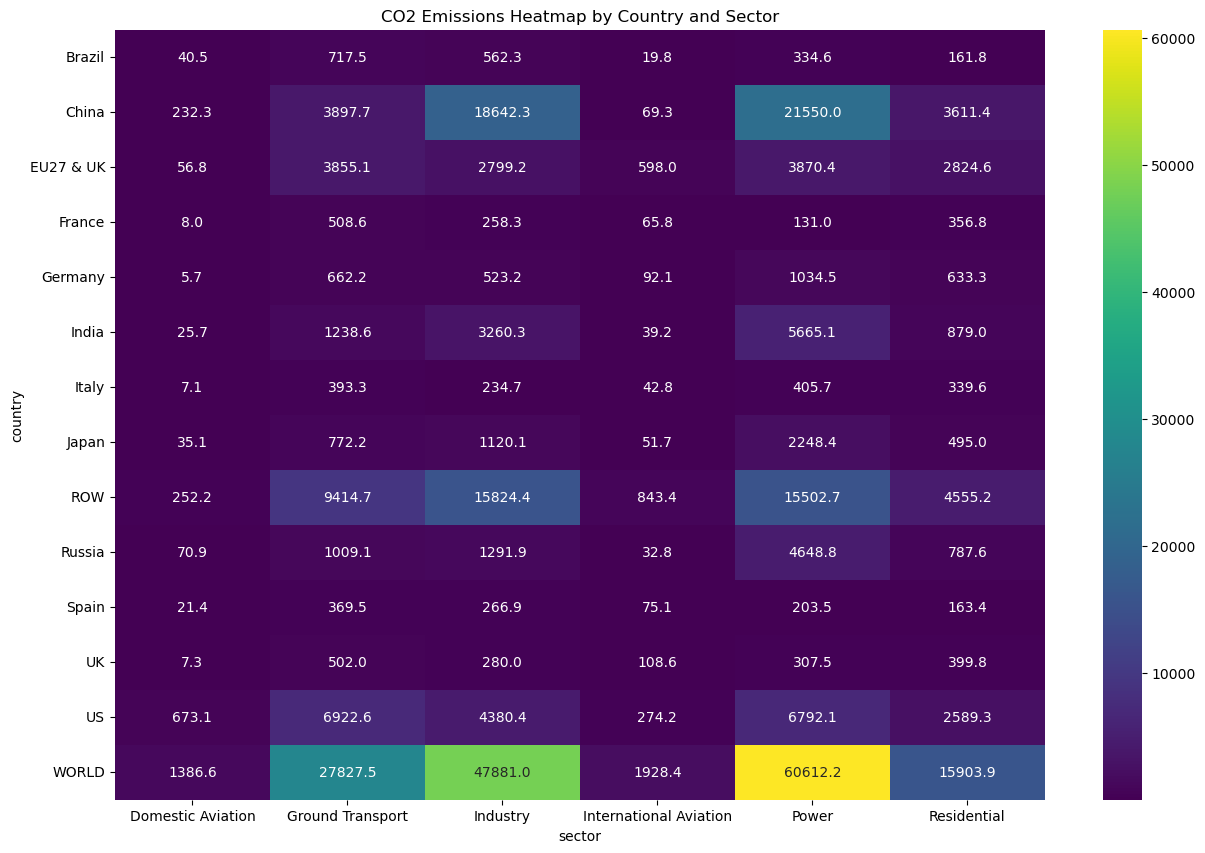

In [37]:
# Heatmap of emissions by country and sector
country_sector = pd.pivot_table(df, 
                               values='value', 
                               index='country', 
                               columns='sector', 
                               aggfunc='sum')

plt.figure(figsize=(15, 10))
sns.heatmap(country_sector, cmap='viridis', annot=True, fmt=".1f")
plt.title('CO2 Emissions Heatmap by Country and Sector')
plt.show()


C:\Users\altam\AppData\Local\Temp\ipykernel_14544\816746862.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.set_index('date').resample('M')['value'].sum()


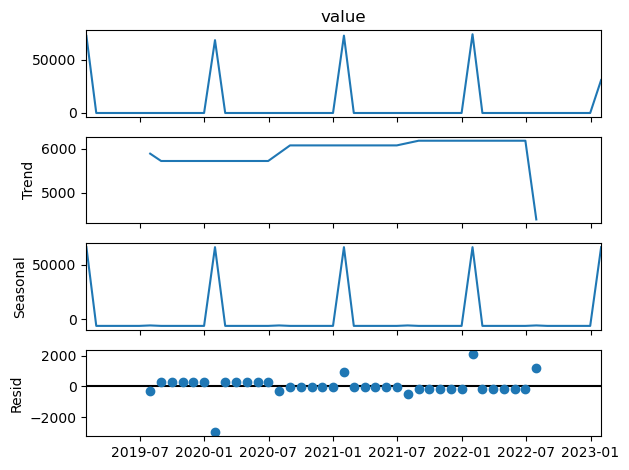

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'date' to datetime (set to first day of year, then expand to monthly)
# If you want to analyze at yearly level, use 'A' (annual) instead of 'M' (monthly)
# Here, we create a monthly DatetimeIndex for demonstration
df_monthly = df.copy()
df_monthly['date'] = pd.to_datetime(df_monthly['date'].astype(str) + '-01-01')
df_monthly = df_monthly.set_index('date').resample('M')['value'].sum()

# Decompose time series (if you have at least 2 years of monthly data)
result = seasonal_decompose(df_monthly, model='additive', period=12)
result.plot()
plt.show()


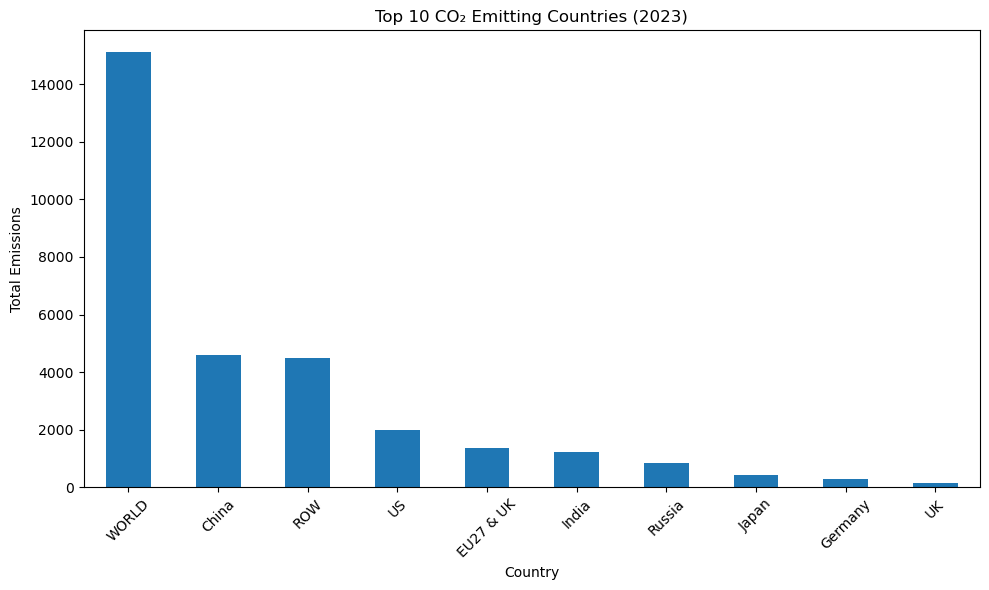

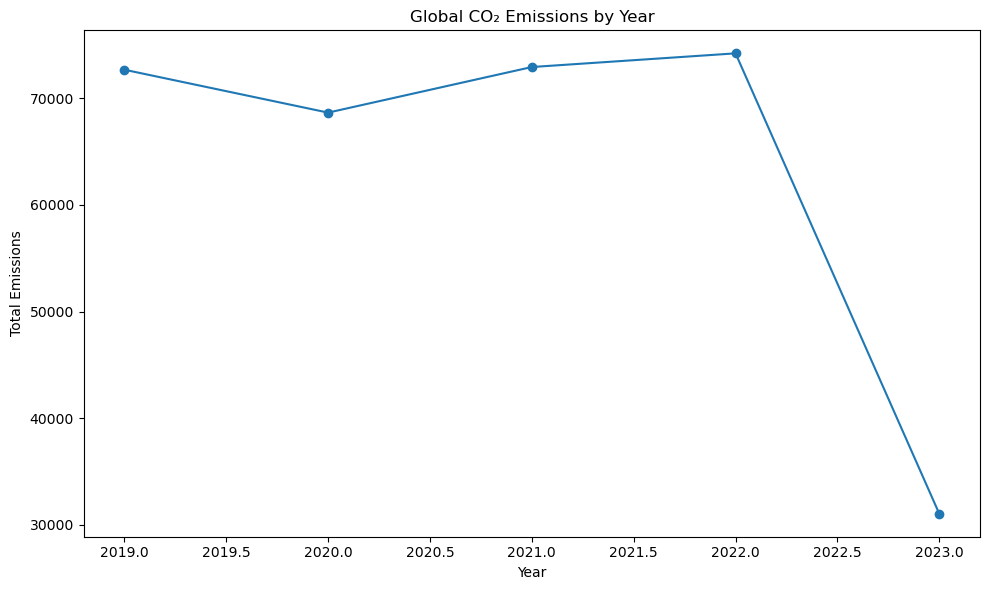

<Figure size 1200x600 with 0 Axes>

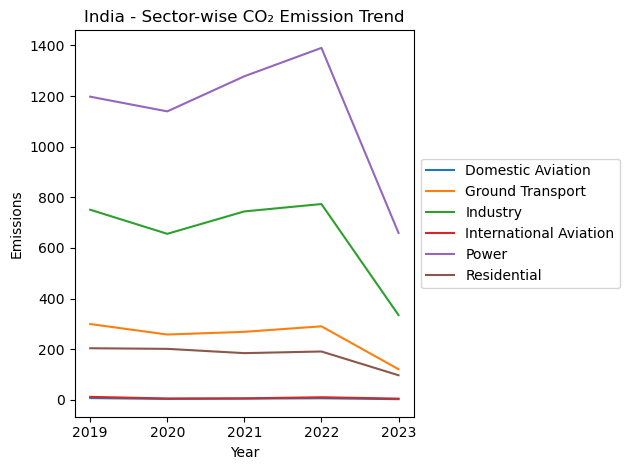

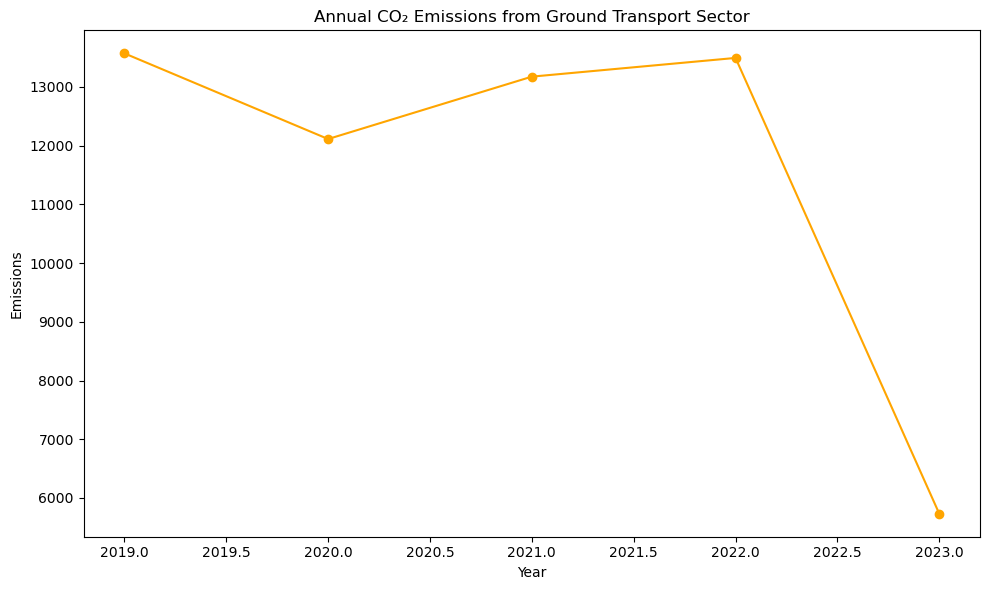

<Figure size 1000x600 with 0 Axes>

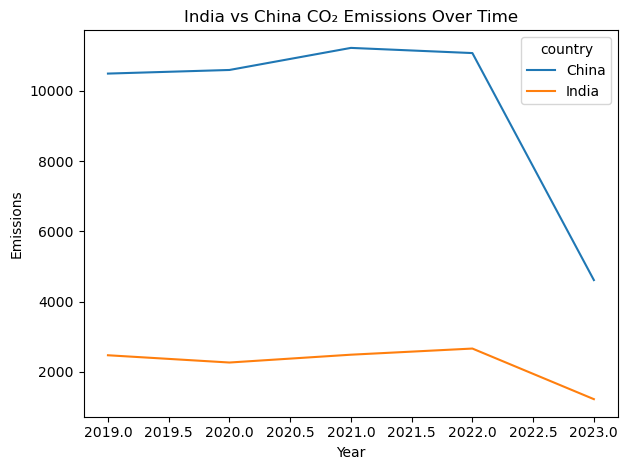

C:\Users\altam\AppData\Local\Temp\ipykernel_14544\4023398270.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cagr_df, x='CAGR_percent', y='Sector', palette='coolwarm')


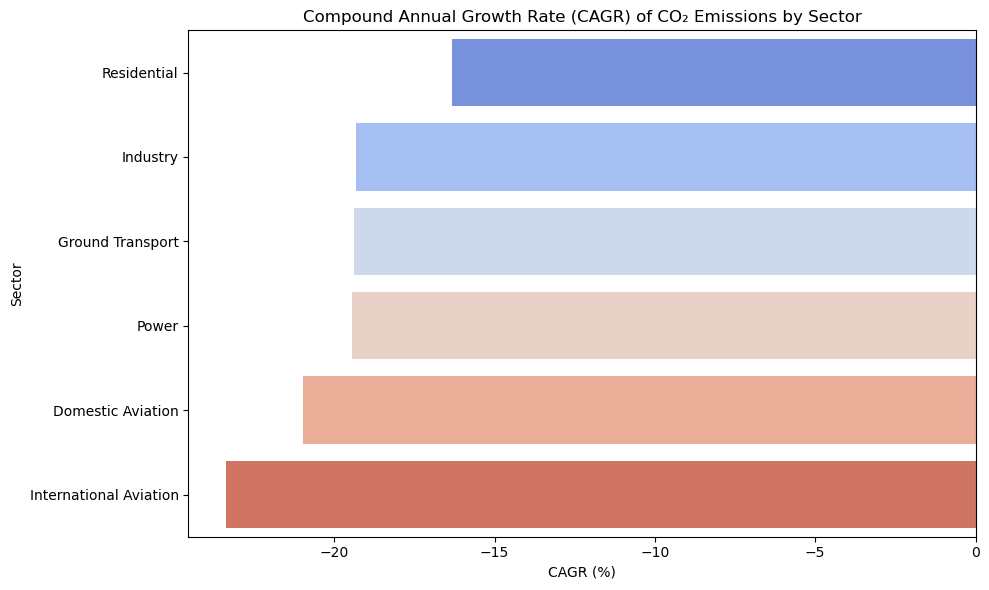

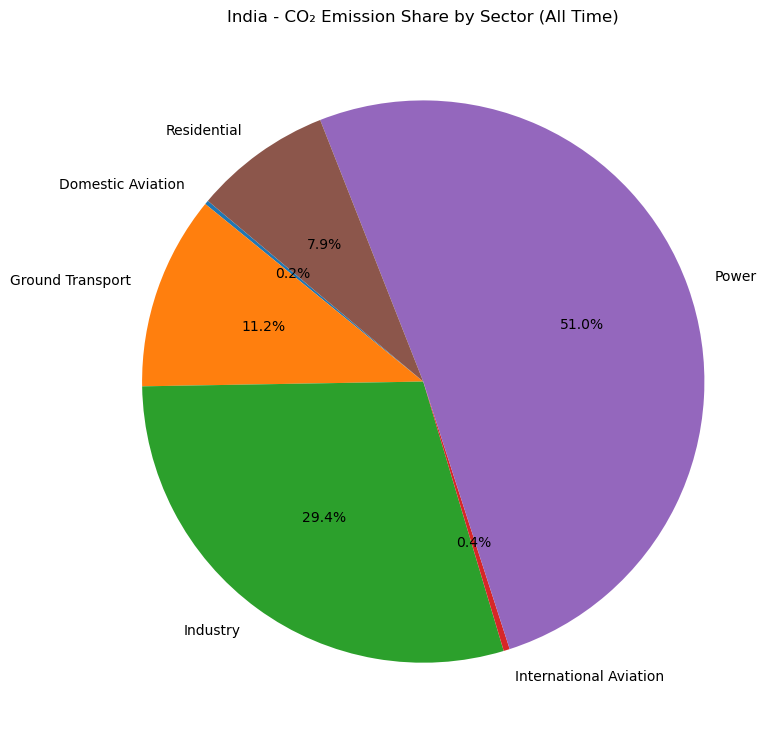

In [ ]:

# plt.style.use('seaborn-darkgrid')

# 1. Top 10 CO₂ Emitting Countries (Latest Year)
latest_year = df['date'].max()
top_countries = df[df['date'] == latest_year].groupby('country')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title(f'Top 10 CO₂ Emitting Countries ({latest_year})')
plt.ylabel('Total Emissions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Global CO₂ Emissions by Year
global_emissions = df.groupby('date')['value'].sum()

plt.figure(figsize=(10, 6))
global_emissions.plot(marker='o')
plt.title('Global CO₂ Emissions by Year')
plt.ylabel('Total Emissions')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


# 3. Sector-wise Emissions Trend for India
india_data = df[df['country'] == 'India']
india_trend = india_data.groupby(['date', 'sector'])['value'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
india_trend.plot()
plt.title('India - Sector-wise CO₂ Emission Trend')
plt.ylabel('Emissions')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# 4. Annual Transport Sector Emissions
# Use ground_transport_trend which is already computed

# Compute annual trend for Ground Transport sector
ground_transport_trend = sector_stats[sector_stats['sector'] == 'Ground Transport'].set_index('date')['value']

plt.figure(figsize=(10, 6))
ground_transport_trend.plot(marker='o', color='orange')
plt.title('Annual CO₂ Emissions from Ground Transport Sector')
plt.ylabel('Emissions')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# 5. Compare Emissions: India vs China
comparison = df[df['country'].isin(['India', 'China'])].groupby(['date', 'country'])['value'].sum().unstack()

plt.figure(figsize=(10, 6))
comparison.plot()
plt.title('India vs China CO₂ Emissions Over Time')
plt.ylabel('Emissions')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# 6. Sector-wise CAGR
sector_stats = df.groupby(['sector', 'date'])['value'].sum().reset_index()
cagr_results = []

for sector in sector_stats['sector'].unique():
    data = sector_stats[sector_stats['sector'] == sector].sort_values('date')
    start_year = data['date'].min()
    end_year = data['date'].max()
    start_value = data[data['date'] == start_year]['value'].sum()
    end_value = data[data['date'] == end_year]['value'].sum()
    
    if start_value > 0 and end_value > 0:
        cagr = (pow(end_value / start_value, 1 / (end_year - start_year)) - 1) * 100
        cagr_results.append((sector, round(cagr, 2)))

cagr_df = pd.DataFrame(cagr_results, columns=['Sector', 'CAGR_percent']).sort_values(by='CAGR_percent', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=cagr_df, x='CAGR_percent', y='Sector', palette='coolwarm')
plt.title('Compound Annual Growth Rate (CAGR) of CO₂ Emissions by Sector')
plt.xlabel('CAGR (%)')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

# 7. Sector Emission Share in India (Pie Chart)
india_share = india_data.groupby('sector')['value'].sum()
plt.figure(figsize=(8, 8))
plt.pie(india_share, labels=india_share.index, autopct='%1.1f%%', startangle=140)
plt.title('India - CO₂ Emission Share by Sector (All Time)')
plt.tight_layout()
plt.show()


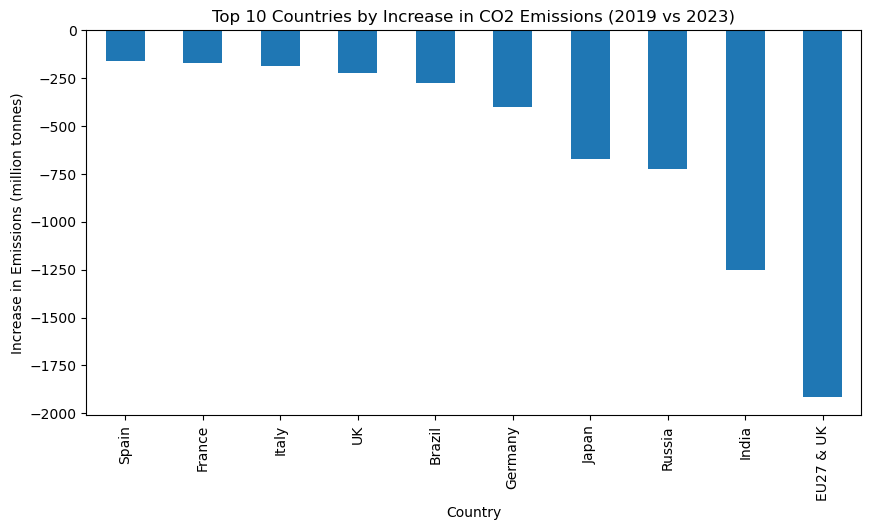

merged_df with 'gdp' and 'value' columns is not available.


In [ ]:


# 1. Countries with the highest increase in emissions (2019 vs 2023)
emissions_2019 = df[df['date'] == 2019].groupby('country')['value'].sum()
emissions_2023 = df[df['date'] == 2023].groupby('country')['value'].sum()
emissions_change = (emissions_2023 - emissions_2019).sort_values(ascending=False).dropna().head(10)
plt.figure(figsize=(10, 5))
emissions_change.plot(kind='bar')
plt.title('Top 10 Countries by Increase in CO2 Emissions (2019 vs 2023)')
plt.ylabel('Increase in Emissions (million tonnes)')
plt.xlabel('Country')
plt.show()

# 2. Correlation between GDP and total emissions for countries with available GDP data
# Skipped: merged_df is not defined in this notebook.
print("merged_df with 'gdp' and 'value' columns is not available.")

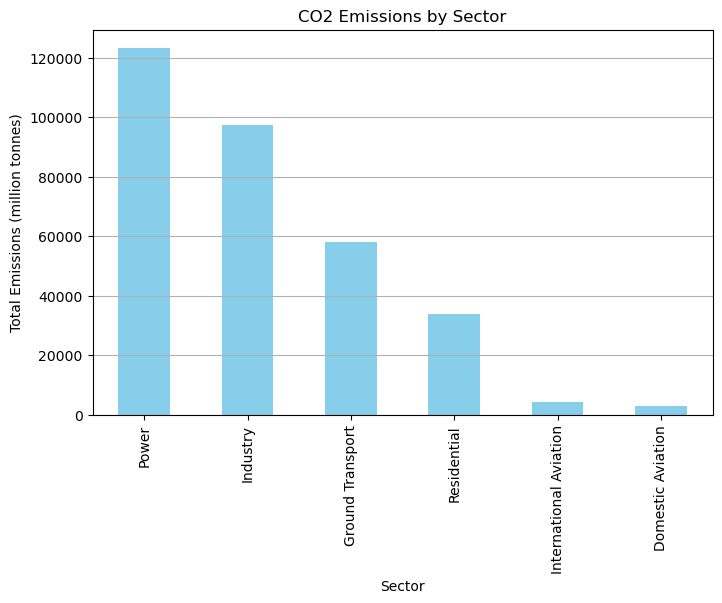

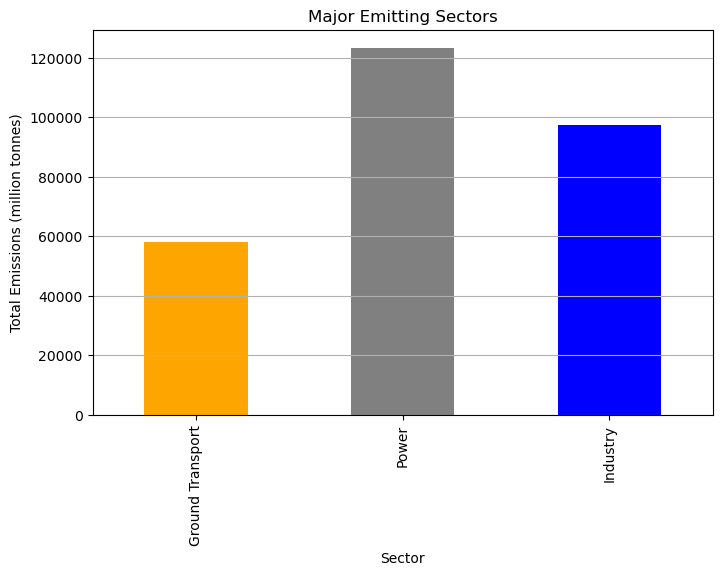

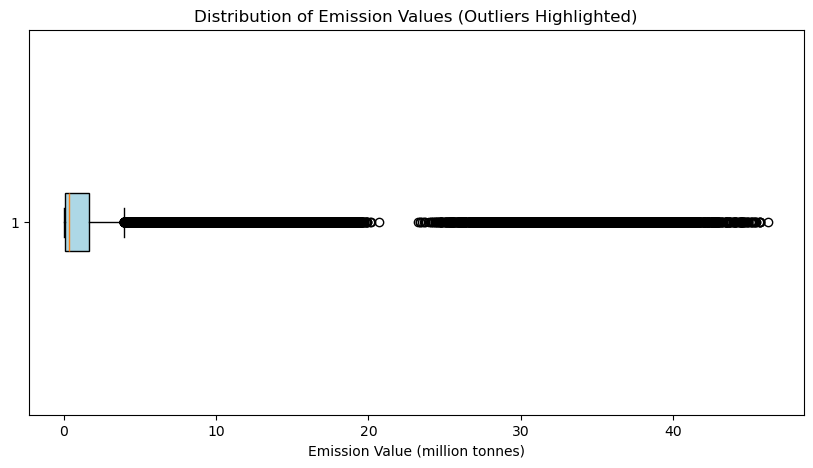

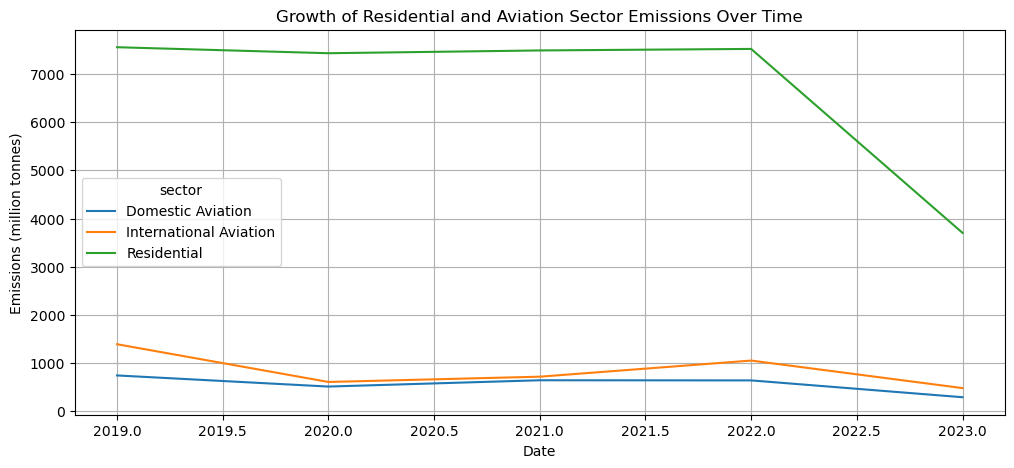

In [43]:
# 1. Power and Industry sectors are the largest contributors to global CO2 emissions
plt.figure(figsize=(8, 5))
sector_dist[['Power', 'Industry', 'Ground Transport', 'Residential', 'Domestic Aviation', 'International Aviation']].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('CO2 Emissions by Sector')
plt.ylabel('Total Emissions (million tonnes)')
plt.xlabel('Sector')
plt.grid(axis='y')
plt.show()

# 2. Ground Transport is a major source of emissions
plt.figure(figsize=(8, 5))
sector_dist[['Ground Transport', 'Power', 'Industry']].plot(kind='bar', color=['orange', 'grey', 'blue'])
plt.title('Major Emitting Sectors')
plt.ylabel('Total Emissions (million tonnes)')
plt.xlabel('Sector')
plt.grid(axis='y')
plt.show()

# 3. Outlier analysis: Distribution of emission values, highlighting outliers
plt.figure(figsize=(10, 5))
plt.boxplot(df['value'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Emission Values (Outliers Highlighted)')
plt.xlabel('Emission Value (million tonnes)')
plt.show()

# 4. Residential and aviation sectors growth over time
df_res_avi = df[df['sector'].isin(['Residential', 'Domestic Aviation', 'International Aviation'])]
res_avi_trend = df_res_avi.groupby(['date', 'sector'])['value'].sum().unstack()
plt.figure(figsize=(12, 5))
res_avi_trend.plot(ax=plt.gca())
plt.title('Growth of Residential and Aviation Sector Emissions Over Time')
plt.ylabel('Emissions (million tonnes)')
plt.xlabel('Date')
plt.grid(True)
plt.show()